In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## X-y Split


In [2]:
df1 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv', )

In [3]:
df1.columns= df1.columns.str.lower().str.replace(' ','_')

In [4]:
df1_num= df1.select_dtypes('number')
df1_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [5]:
df1_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [6]:
y=df1_num['total_claim_amount']
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

In [7]:
x= df1_num.drop(['total_claim_amount'] , axis=1)
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


## Train Test split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test= train_test_split( x,y, test_size=0.25, random_state= 42)

In [9]:
x_train.shape

(6850, 7)

In [10]:
x_test.shape

(2284, 7)

## NORMALIZATION

In [11]:
from sklearn.preprocessing import PowerTransformer

In [12]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt.fit(x_train)
x_train_pt = pt.transform(x_train)
df1_x_train_pt = pd.DataFrame(x_train_pt, columns=x_train.columns)
df1_x_train_pt.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.154555,0.807677,1.360867,1.657330,1.471319,-0.500344,-1.152021
1,1.102186,-1.655812,1.806474,0.058035,0.799894,-0.500344,0.873446
2,0.434349,0.401585,0.584358,1.188175,0.162640,1.953933,1.126458


In [13]:
x_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
8607,5389.499465,66429,136,35,93,0,1
2121,12786.668980,0,180,14,70,0,4
5361,7834.151482,36094,99,28,50,1,5
7003,8223.164916,95102,101,6,73,0,8
7416,9031.214859,0,122,15,47,0,9


In [14]:
x_test_pt = pt.transform(x_test)
df1_x_test_pt = pd.DataFrame(x_test_pt, columns=x_train.columns)
df1_x_test_pt.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.580388,0.892951,0.782412,-1.675324,0.129050,-0.500344,-1.152021
1,-0.116343,0.148364,-0.709595,-0.698111,-1.431989,-0.500344,0.873446
2,-0.771454,1.079498,0.420686,-1.278645,-0.254527,-0.500344,-1.152021


In [15]:
x_test_pt = pt.transform(x_test)
df_T_test_pt=pd.DataFrame(x_test_pt, columns= x_train.columns)
x_test_pt

array([[-0.5803884 ,  0.89295075,  0.78241241, ...,  0.12905012,
        -0.50034428, -1.152021  ],
       [-0.11634315,  0.14836355, -0.70959468, ..., -1.43198922,
        -0.50034428,  0.87344645],
       [-0.77145379,  1.07949758,  0.42068586, ..., -0.25452733,
        -0.50034428, -1.152021  ],
       ...,
       [-0.03575886,  0.98848578, -0.64195195, ...,  1.156943  ,
        -0.50034428,  1.12645756],
       [ 0.07211214,  0.72937071, -0.27964479, ...,  0.55215709,
         1.95393305,  1.57180143],
       [ 0.23054744, -1.65581212,  0.45509672, ..., -0.96116203,
        -0.50034428,  1.12645756]])

In [17]:
df1_cat = df1.select_dtypes('object')
df1_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [18]:
df1_cat.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [19]:
df1_cat.shape

(9134, 16)

In [20]:
one_hot_df = pd.get_dummies(df1_cat, drop_first=True)
one_hot_df

,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Encoding categoricals
- Ordinal: categories have an inherent order (ie: grades) - LabelEncoder
- Nominal: no inherent order (ie: state, gender) - OneHotEncoder

In [22]:
df1_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [23]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first', sparse=False)
state_enc = enc.fit_transform(df1_cat[['state']])
state_enc = pd.DataFrame(state_enc)
state_enc

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
9129,1.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0


In [24]:
# Ordinal columns
df1_cat['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [25]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le_coverage = le.fit_transform(df1_cat[['coverage']])
le_coverage = pd.DataFrame(le_coverage, columns=['coverage'])
le_coverage

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,coverage
0,0
1,1
2,2
3,0
4,0
...,...
9129,0
9130,1
9131,1
9132,1


<BarContainer object of 3 artists>

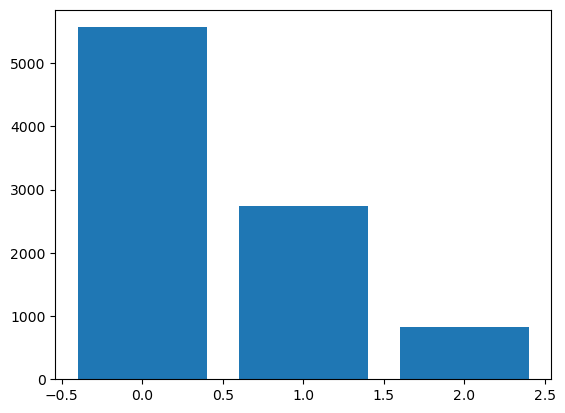

In [26]:
plt.bar(le_coverage['coverage'].unique(), le_coverage['coverage'].value_counts() )

## MODELING

In [14]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg() #model
linreg.fit(x_train , y_train)  #model train
y_pred_linreg=linreg.predict(x_test) #model predition


In [28]:
#Modelo con datos transformados (PowerTransformation yeo johnson)
linreg_pt = LinReg()
linreg_pt.fit(df1_x_train_pt, y_train)
y_pred_train_pt = linreg_pt.predict(df1_x_train_pt)

train_score_pt=linreg_pt.score(df1_x_train_pt, y_train)
train_score_pt

0.4359520131133471

In [35]:
y_pred_test_pt = linreg_pt.predict(df1_x_test_pt)
test_score_pt=linreg_pt.score(df1_x_test_pt, y_test)
test_score_pt

0.39912607190065963

In [36]:
#MSE DE DATOS POWER TRANSFORMED
train_mse = mse (y_pred_train_pt , y_train)
test_mse = mse (y_pred_test_pt , y_test)
train_mse , test_mse


(48242.284953810406, 48604.686125981774)

## MOdel Validation

  R2
  MSE
  RMSE
    

In [15]:
train_score=linreg.score(x_train , y_train)
test_score=linreg.score(x_test, y_test)
train_score , test_score

(0.5217065876763485, 0.5083881701685621)

In [19]:
from sklearn.metrics import mean_squared_error as mse
train_mse = mse(y_pred_train,y_train)
test_mse = mse(y_pred_test,y_test)
train_mse, test_mse

(40907.80860013017, 39766.476073207465)

In [20]:
from sklearn.metrics import mean_absolute_error as mae
train_mae = mae(y_pred_train,y_train)
test_mae = mae(y_pred_test,y_test)
train_mae, test_mae

(144.6228085334776, 144.2248907750531)